In [133]:
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [196]:
actual = pd.read_csv("/Users/mz195/BTC_price_db.csv")
arima = pd.read_csv("/Users/mz195/arima_predictions.csv")
varmax = pd.read_csv("/Users/mz195/varmax_predictions.csv")
ses = pd.read_csv("/Users/mz195/ses_predictions.csv")

In [197]:
print("Actual:\t{}".format(actual.shape))
print("ARIMA:\t{}".format(arima.shape))
print("VARMAX:\t{}".format(varmax.shape))
print("SES:\t{}".format(ses.shape))

Actual:	(13046, 2)
ARIMA:	(7374, 2)
VARMAX:	(5205, 2)
SES:	(4722, 2)


In [198]:
arima_df = actual.merge(arima, on='time_')
arima_varmax_df = arima_df.merge(varmax, on='time_')
all_models_df = arima_varmax_df.merge(ses, on='time_')
all_models_df.shape

(4716, 5)

<AxesSubplot:>

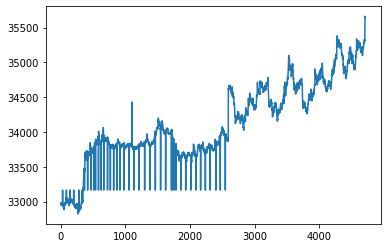

In [199]:
all_models_df["price_avg"].plot(kind="line")

In [200]:
num = int(2000)
all_models_df2 = all_models_df[-(num):]

In [201]:
all_models_df2.shape

(2000, 5)

In [202]:
all_models_df2

,time_,price_avg,arima,varmax,ses
2716,2021-06-28 20:49:30,34207.365850,34189.360343,34348.151050,34196.143883
2717,2021-06-28 20:50:00,34220.890400,34200.663996,34357.354019,34201.656133
2718,2021-06-28 20:50:30,34228.753467,34216.817763,34343.298882,34211.658961
2719,2021-06-28 20:51:00,34225.855700,34229.930482,34388.832964,34225.129437
2720,2021-06-28 20:51:30,34223.326400,34231.174675,34309.717251,34228.441772
...,...,...,...,...,...
4711,2021-06-29 13:37:00,35644.489525,35768.595760,35361.014036,35573.229359
4712,2021-06-29 13:37:30,35663.665850,35698.838476,35374.426853,35616.205036
4713,2021-06-29 13:38:00,35660.303075,35722.659223,35369.995759,35663.662765
4714,2021-06-29 13:38:30,35647.898350,35716.181341,35349.510671,35666.254453


<AxesSubplot:>

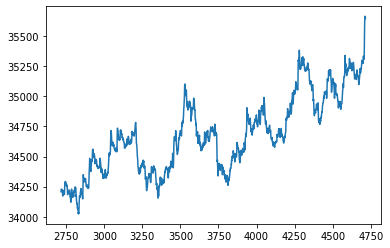

In [203]:
all_models_df2["price_avg"].plot(kind="line")

In [204]:
X = all_models_df2.drop(["time_", "price_avg"], axis=1)
y = all_models_df2.price_avg

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
    
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
    
poly_reg = PolynomialFeatures(degree = 1)
poly_train = poly_reg.fit_transform(pd.DataFrame(scaled_X_train))
poly_test = poly_reg.transform(pd.DataFrame(scaled_X_test))
    
lr = LinearRegression()
lr.fit(poly_train, y_train)
    
preds = lr.predict(poly_test)

In [206]:
# Cost Functions for the Linear Regression
print("---- Cost functions for LR ----")
print("Avg Training Score:\t\t", lr.score(poly_train,y_train))
print("Avg Testing Score:\t\t", lr.score(poly_test,y_test))
print("Avg MAE:\t\t\t", mean_absolute_error(y_test, preds))
print("Avg RMSE:\t\t\t", mean_squared_error(y_test, preds, squared=False))
print("Avg MSE:\t\t\t", mean_squared_error(y_test, preds))

---- Cost functions for LR ----
Avg Training Score:		 0.9919530634610229
Avg Testing Score:		 0.9925929464403059
Avg MAE:			 18.494939485279684
Avg RMSE:			 26.656980624426325
Avg MSE:			 710.5946160110406


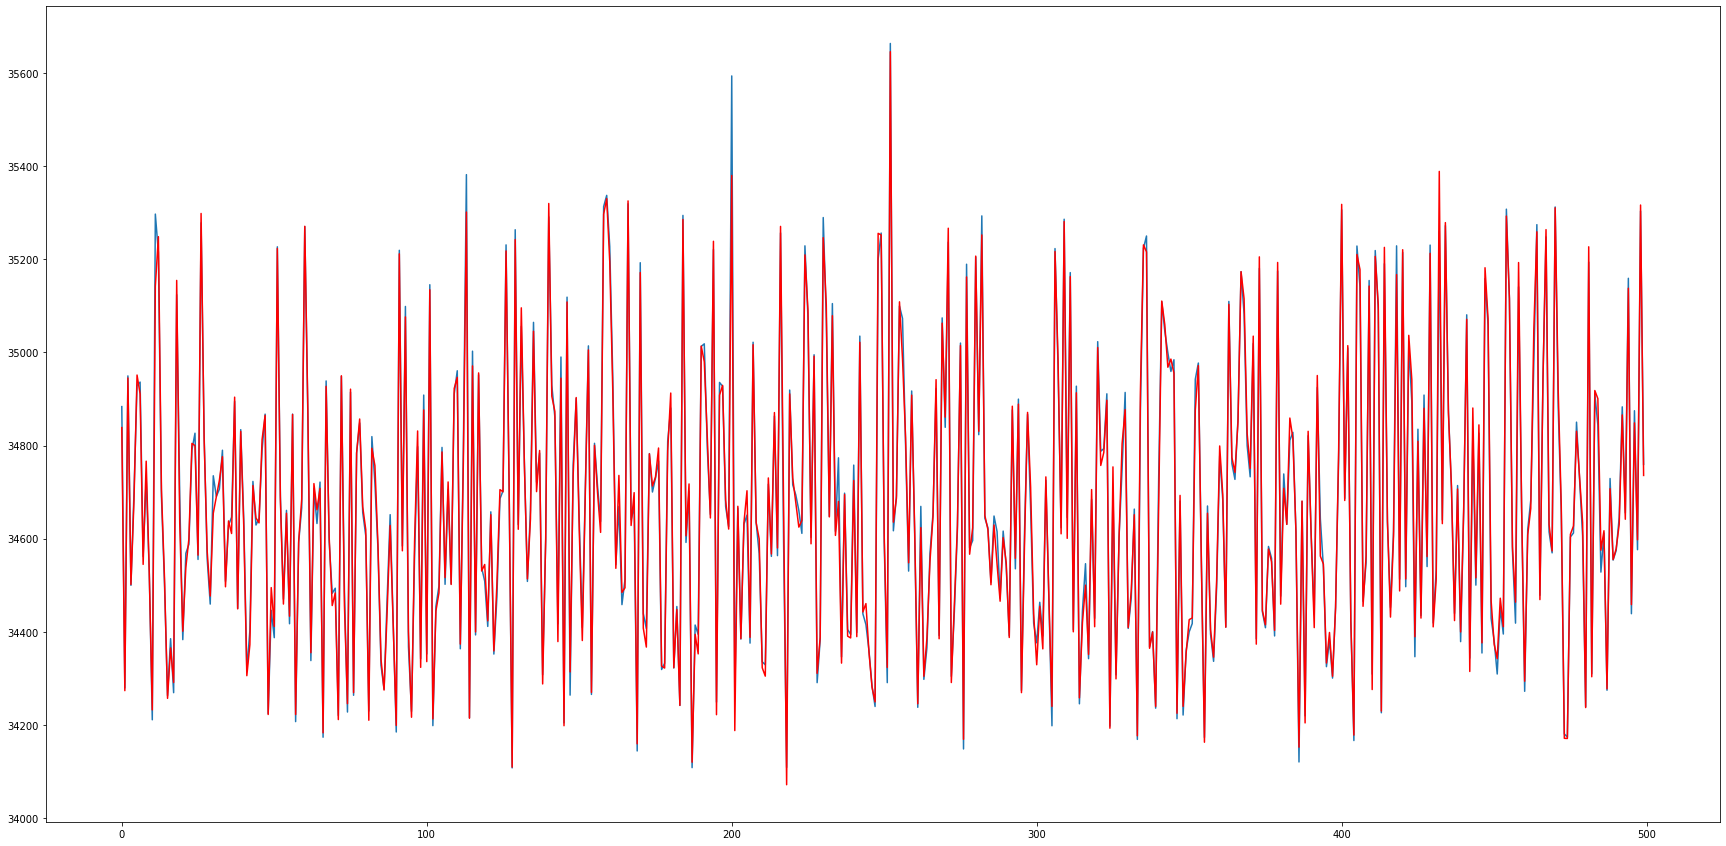

In [207]:
preds2 = [x for x in preds]
test2 = [x for x in y_test]
# plot forecasts against actual outcomes
plt.figure(figsize=(30,15))
plt.plot(test2)
plt.plot(preds2, color='red')
plt.show()